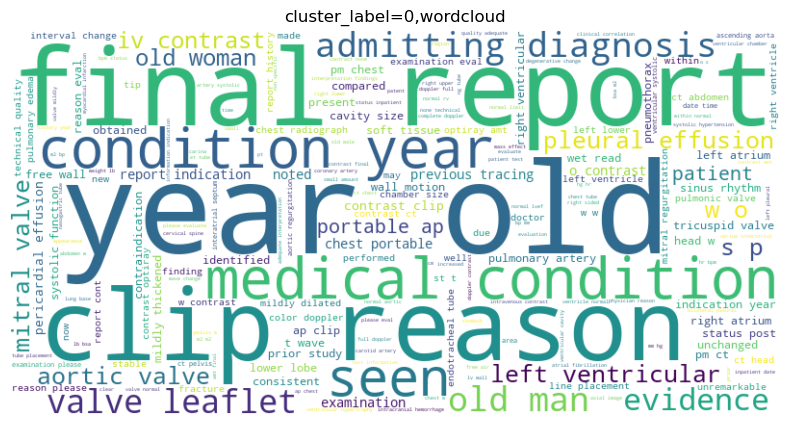

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 读取 CSV 文件
df = pd.read_csv('/mnt/nvme2/yyc/clinicalbert/data/3days/train_pca_clusters.csv')

# 筛选出 cluster_label 为 0 的数据
df_cluster0 = df[df['cluster_label'] == 0]

# 将所有 TEXT 列的内容合并成一个长字符串（处理缺失值）
all_text = ' '.join(df_cluster0['TEXT'].dropna().astype(str))

# 生成词云图
# 如果文本包含中文，请确保 font_path 指向支持中文的字体（如 simhei.ttf）
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('cluster_label=0,wordcloud')
plt.show()


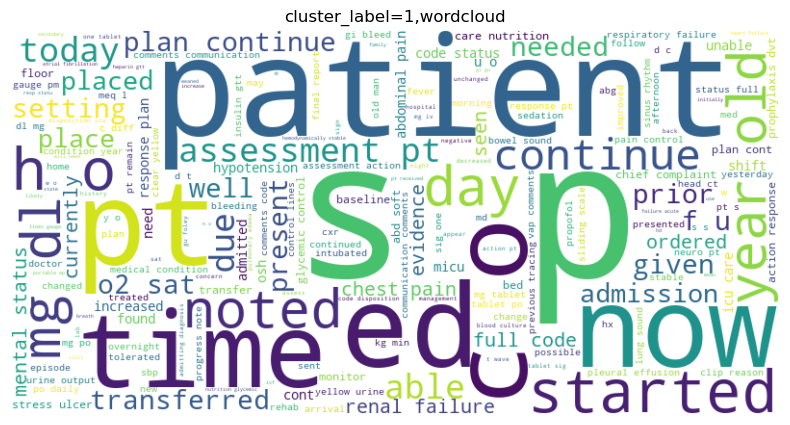

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 读取 CSV 文件
df = pd.read_csv('/mnt/nvme2/yyc/clinicalbert/data/3days/train_pca_clusters.csv')

# 筛选出 cluster_label 为 1 的数据
df_cluster0 = df[df['cluster_label'] == 1]

# 将所有 TEXT 列的内容合并成一个长字符串（处理缺失值）
all_text = ' '.join(df_cluster0['TEXT'].dropna().astype(str))

# 生成词云图
# 如果文本包含中文，请确保 font_path 指向支持中文的字体（如 simhei.ttf）
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('cluster_label=1,wordcloud')
plt.show()



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 读取 CSV 文件
df = pd.read_csv('/mnt/nvme2/yyc/clinicalbert/data/3days/train_pca_clusters.csv')

# 筛选出 cluster_label 为 2 的数据
df_cluster0 = df[df['cluster_label'] == 2]

# 将所有 TEXT 列的内容合并成一个长字符串（处理缺失值）
all_text = ' '.join(df_cluster0['TEXT'].dropna().astype(str))

# 生成词云图
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('cluster_label=2,wordcloud')
plt.show()



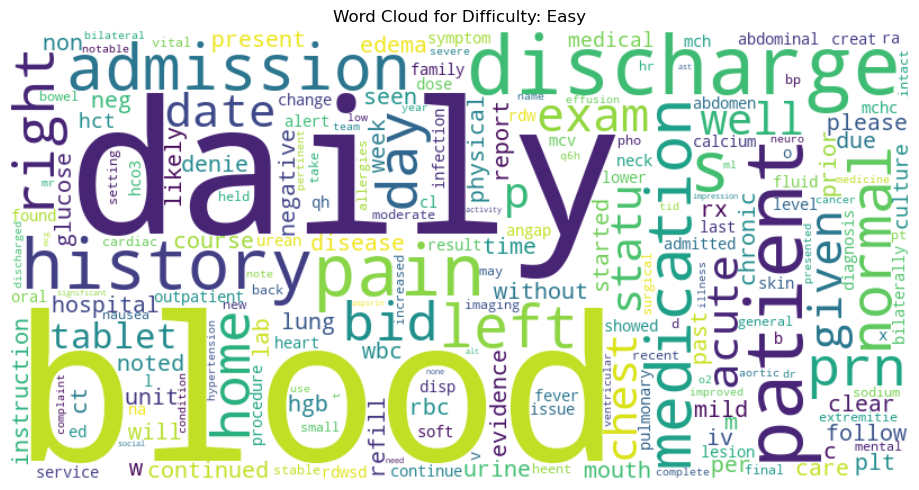

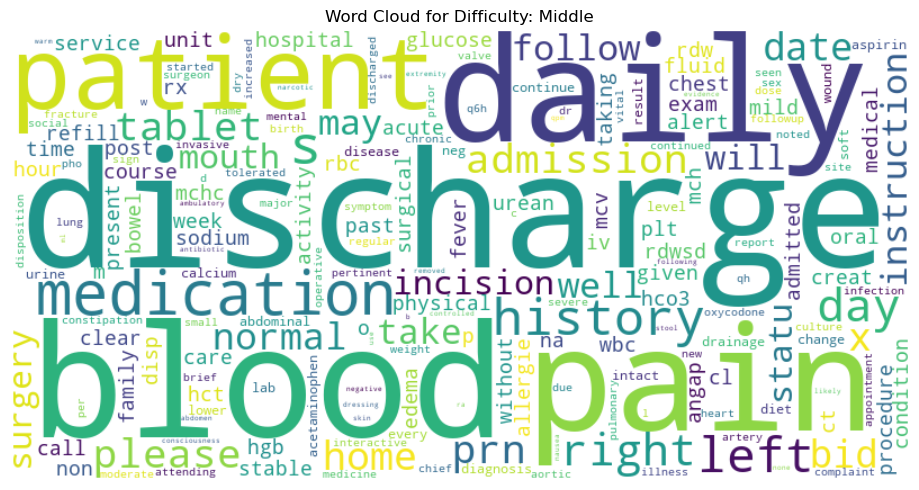

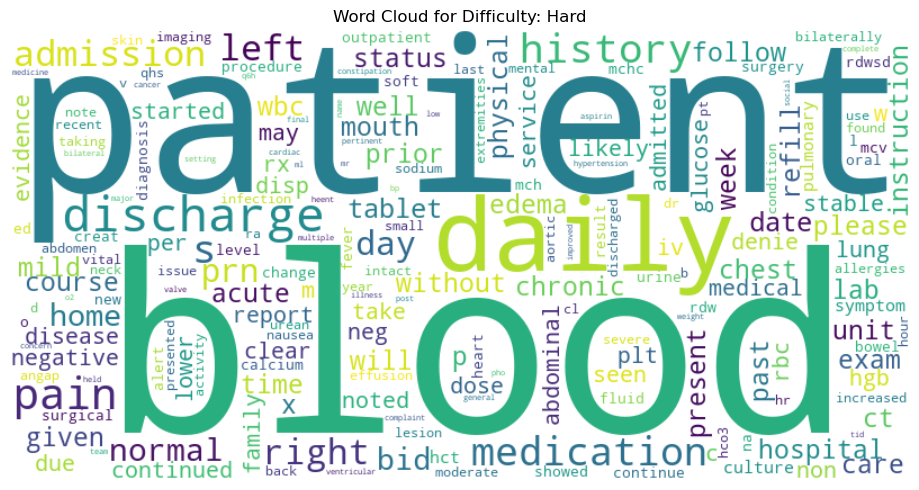

In [16]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 读取 Feather 文件
df = pd.read_feather("/mnt/nvme2/yyc/medical-coding/files/data/mimiciv_icd10/mimiciv_icd10_clusters3.feather")

# 自定义要过滤掉的高频无关词
custom_stopwords = set(STOPWORDS)
custom_stopwords.update({"po", "mg"})

# 为每个 difficulty 生成词云
for diff in ['easy', 'middle', 'hard']:
    # 筛选对应 difficulty 的文本并合并
    texts = df[df['difficulty'] == diff]['text'].dropna().tolist()
    combined_text = " ".join(texts)
    
    # 生成词云，传入自定义 stopwords
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white', 
        stopwords=custom_stopwords,
        collocations=False
    ).generate(combined_text)
    
    # 可视化
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Difficulty: {diff.capitalize()}")
    plt.tight_layout()
    plt.show()



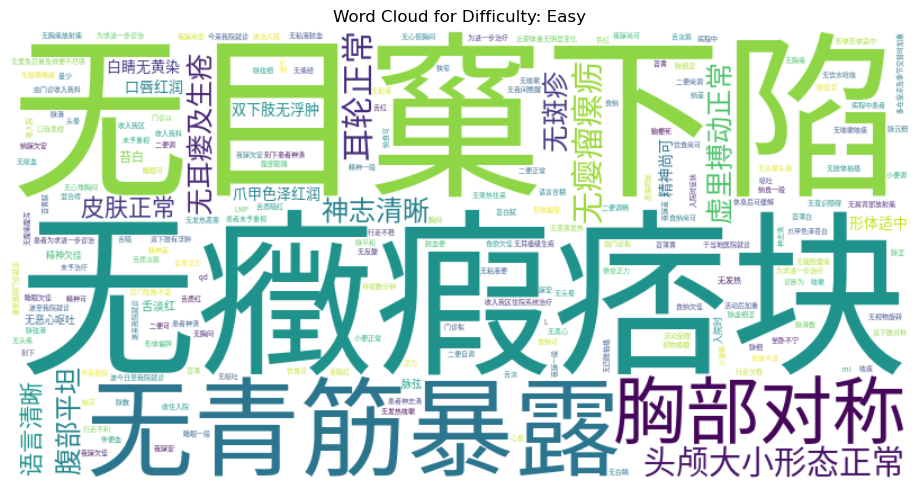

In [13]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. 读取 JSONL 文件
df = pd.read_json(
    "/mnt/nvme2/yyc/TCM/TCM_SD_train_dev/train_with_difficulty_mapped.json",
    lines=True
)

# 2. 自定义要过滤掉的高频无关词
custom_stopwords = set(STOPWORDS)
custom_stopwords.update({
    "颈部对称", 
})

# 3. 为每个 difficulty 生成词云
for diff in ['easy', 'middle', 'hard']:
    # 3.1 筛选对应 difficulty 的文本并合并
    texts = df[df['difficulty'] == diff]['TEXT'].dropna().tolist()
    combined_text = " ".join(texts)
    
    # 3.2 生成词云，传入自定义 stopwords
    wc = WordCloud(
        font_path="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        collocations=False
    ).generate(combined_text)
    
    # 3.3 可视化
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Difficulty: {diff.capitalize()}")
    plt.tight_layout()
    plt.show()


In [11]:
import matplotlib.font_manager as fm

# 列出所有系统字体
all_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 过滤出可能的中文字体路径
ch_fonts = [f for f in all_fonts if any(kw in f.lower() for kw in ['simhei', 'wqy', 'noto', 'msyh', 'ukai'])]
print("找到以下中文字体（请选择其中一个路径作为 font_path）：")
for f in ch_fonts:
    print(f)

找到以下中文字体（请选择其中一个路径作为 font_path）：
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
/usr/share/fonts/truetype/noto/NotoSansMono-Regular.ttf
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc
/usr/share/fonts/truetype/noto/NotoSansMono-Bold.ttf
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc
/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf
/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc
/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf


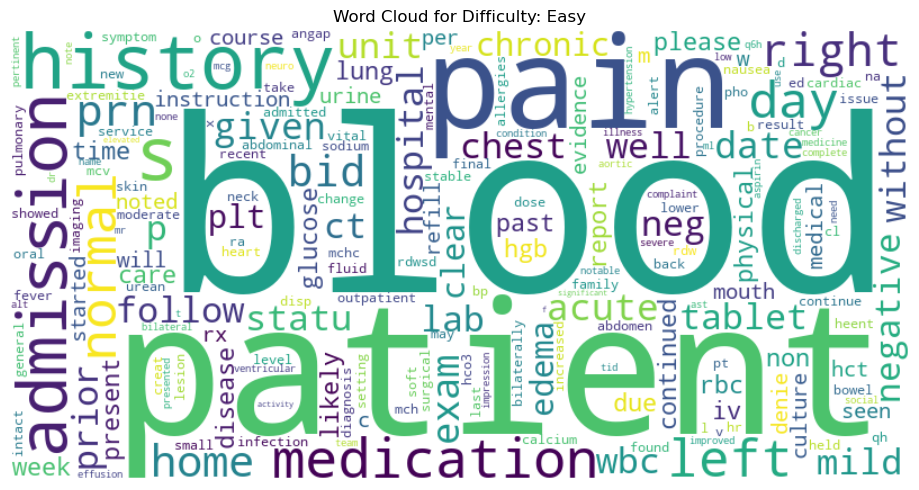

In [20]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 读取 Feather 文件
df = pd.read_feather("/mnt/nvme2/yyc/medical-coding/files/data/mimiciv_icd10/mimiciv_icd10_clusters3.feather")

# 自定义要过滤掉的高频无关词
custom_stopwords = set(STOPWORDS)
custom_stopwords.update({"po", "mg","daily","discharge"})

# 为每个 difficulty 生成词云
for diff in ['easy']:
    # 筛选对应 difficulty 的文本并合并
    texts = df[df['difficulty'] == diff]['text'].dropna().tolist()
    combined_text = " ".join(texts)
    
    # 生成词云，传入自定义 stopwords
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white', 
        stopwords=custom_stopwords,
        collocations=False
    ).generate(combined_text)
    
    # 可视化
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Difficulty: {diff.capitalize()}")
    plt.tight_layout()
    plt.show()

In [18]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 读取 Feather 文件
df = pd.read_feather("/mnt/nvme2/yyc/medical-coding/files/data/mimiciv_icd10/mimiciv_icd10_clusters3.feather")

# 自定义要过滤掉的高频无关词
custom_stopwords = set(STOPWORDS)
custom_stopwords.update({"po", "mg","daily","blood"})

# 为每个 difficulty 生成词云
for diff in ['middle']:
    # 筛选对应 difficulty 的文本并合并
    texts = df[df['difficulty'] == diff]['text'].dropna().tolist()
    combined_text = " ".join(texts)
    
    # 生成词云，传入自定义 stopwords
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white', 
        stopwords=custom_stopwords,
        collocations=False
    ).generate(combined_text)
    
    # 可视化
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Difficulty: {diff.capitalize()}")
    plt.tight_layout()
    plt.show()

In [21]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 读取 Feather 文件
df = pd.read_feather("/mnt/nvme2/yyc/medical-coding/files/data/mimiciv_icd10/mimiciv_icd10_clusters3.feather")

# 自定义要过滤掉的高频无关词
custom_stopwords = set(STOPWORDS)
custom_stopwords.update({"po", "mg","patient","blood","discharge"})

# 为每个 difficulty 生成词云
for diff in ['hard']:
    # 筛选对应 difficulty 的文本并合并
    texts = df[df['difficulty'] == diff]['text'].dropna().tolist()
    combined_text = " ".join(texts)
    
    # 生成词云，传入自定义 stopwords
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white', 
        stopwords=custom_stopwords,
        collocations=False
    ).generate(combined_text)
    
    # 可视化
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Difficulty: {diff.capitalize()}")
    plt.tight_layout()
    plt.show()